## Importing Libraries

In [302]:
import numpy as np
import pandas as pd
import plotly.express as px
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [303]:
df = pd.read_csv("data.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


## Data Exploration

In [304]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

We can observe several categorical data types represented by int data type.
- Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
- Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

These categorical data are summarized representations of numerical variables present within data sets, so it's possible to drop them when finding correlation to 'Bankrupt?'

In [305]:
df.drop([' Net Income Flag',' Liability-Assets Flag'], axis='columns', inplace=True)

In [306]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Net Income to Stockholder's Equity                         float64
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Equity to Liability                                        float64
Length: 94, dtype: object

In [307]:
print("New data dimensions: ", df.shape)

New data dimensions:  (6819, 94)


## Imbalanced Data

In [308]:
#imbalanced data
print(f"""
Not Bankrupt => {df[df["Bankrupt?"] == 0]["Bankrupt?"].value_counts().values}
Bankrupt => {df[df["Bankrupt?"] == 1]["Bankrupt?"].value_counts().values}
""")


Not Bankrupt => [6599]
Bankrupt => [220]



## Finding Correlation

In [309]:
df_corr = abs(df.corr()["Bankrupt?"]).sort_values(ascending=False)
df_new = df_corr.drop(['Bankrupt?'])
fig = px.bar(df_new, orientation="h", color_discrete_sequence=["#C1E1C1"])
fig.update_layout(showlegend=False)
fig.show()

In [328]:
df_new.head(10)

 Net Income to Total Assets                                 0.315457
 ROA(A) before interest and % after tax                     0.282941
 ROA(B) before interest and depreciation after tax          0.273051
 ROA(C) before interest and depreciation before interest    0.260807
 Net worth/Assets                                           0.250161
 Debt ratio %                                               0.250161
 Persistent EPS in the Last Four Seasons                    0.219560
 Retained Earnings to Total Assets                          0.217779
 Net profit before tax/Paid-in capital                      0.207857
 Per Share Net profit before tax (Yuan ¥)                   0.201395
Name: Bankrupt?, dtype: float64

In [311]:
#choosing top 10 features with highest correlation
df_best_corr = pd.DataFrame(df_new.head(10))

In [312]:
fig = px.bar(df_best_corr, orientation="h", color_discrete_sequence=["#C1E1C1"])
fig.update_layout(showlegend=False)
fig.show()

In [313]:
#filtering DF to contain only chosen features, including 'Bankrupt?'
df_chosen = df[['Bankrupt?',' Net Income to Total Assets',' ROA(A) before interest and % after tax',' ROA(B) before interest and depreciation after tax',' ROA(C) before interest and depreciation before interest',' Net worth/Assets',' Debt ratio %',' Persistent EPS in the Last Four Seasons',' Retained Earnings to Total Assets',' Net profit before tax/Paid-in capital',' Per Share Net profit before tax (Yuan ¥)']]

In [314]:
df_chosen

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥)
0,1,0.716845,0.424389,0.405750,0.370594,0.792424,0.207576,0.169141,0.903225,0.137757,0.138736
1,1,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962,0.169918
2,1,0.774670,0.499019,0.472295,0.426071,0.792484,0.207516,0.180581,0.909903,0.148036,0.142803
3,1,0.739555,0.451265,0.457733,0.399844,0.848535,0.151465,0.193722,0.906902,0.147561,0.148603
4,1,0.795016,0.538432,0.522298,0.465022,0.893491,0.106509,0.212537,0.913850,0.167461,0.168412
...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.799927,0.539468,0.543230,0.493687,0.875382,0.124618,0.216602,0.925611,0.171111,0.172102
6815,0,0.799748,0.538269,0.524172,0.475162,0.900747,0.099253,0.216697,0.932629,0.171805,0.172780
6816,0,0.797778,0.533744,0.520638,0.472725,0.961061,0.038939,0.210929,0.932000,0.172287,0.173232
6817,0,0.811808,0.559911,0.554045,0.506264,0.913021,0.086979,0.228326,0.939613,0.182498,0.185584


## Data Visualization

In [315]:
#separating 2DFs for 1-bankrupt and 0-not bankrupt
df1 = df_chosen[df_chosen['Bankrupt?']==1] #bankrupt DF
df1.describe()

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥)
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.0,0.738083,0.456947,0.461483,0.418503,0.812953,0.187047,0.188818,0.904244,0.147672,0.147765
std,0.0,0.081092,0.107674,0.091825,0.081068,0.056234,0.056234,0.030709,0.035218,0.027048,0.027848
min,1.0,0.411809,0.000000,0.033514,0.024277,0.474590,0.001088,0.000000,0.729196,0.000000,0.000000
25%,1.0,0.719248,0.431531,0.432665,0.391703,0.785720,0.158728,0.176397,0.894705,0.137635,0.137267
50%,1.0,0.766297,0.490215,0.488597,0.441330,0.812574,0.187426,0.195944,0.912923,0.154012,0.155306
75%,1.0,0.789621,0.526630,0.519153,0.469276,0.841272,0.214280,0.208944,0.928370,0.165393,0.166340
max,1.0,0.819091,0.582861,0.619091,0.576951,0.998912,0.525410,0.252529,0.955245,0.197647,0.198765


In [316]:
#separating 2DFs for 1-bankrupt and 0-not bankrupt
df0 = df_chosen[df_chosen['Bankrupt?']==0] #not bankrupt DF
df0.describe()

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥)
count,6599.0,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000
mean,0.0,0.810083,0.562015,0.556659,0.508069,0.889286,0.110714,0.230146,0.935749,0.183883,0.185581
std,0.0,0.035991,0.060898,0.057864,0.057694,0.052071,0.052071,0.032510,0.024538,0.030211,0.032646
min,0.0,0.000000,0.006923,0.000000,0.000000,0.000000,0.000000,0.078567,0.000000,0.052439,0.009114
25%,0.0,0.797819,0.537724,0.529472,0.478623,0.854204,0.071560,0.215278,0.931820,0.169942,0.170972
50%,0.0,0.811492,0.561219,0.553563,0.504314,0.890619,0.109381,0.225111,0.938058,0.179021,0.180236
75%,0.0,0.827158,0.590438,0.585577,0.537074,0.928440,0.145796,0.239671,0.945127,0.192203,0.194246
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


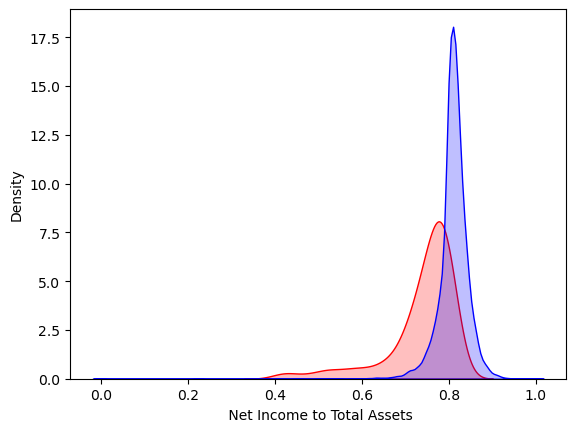

In [317]:
#1st variable - likelihood of bankruptcy
fig = sns.kdeplot(df1[' Net Income to Total Assets'], shade=True, color="r") #bankrupt
fig = sns.kdeplot(df0[' Net Income to Total Assets'], shade=True, color="b") #not bankrupt
plt.show()

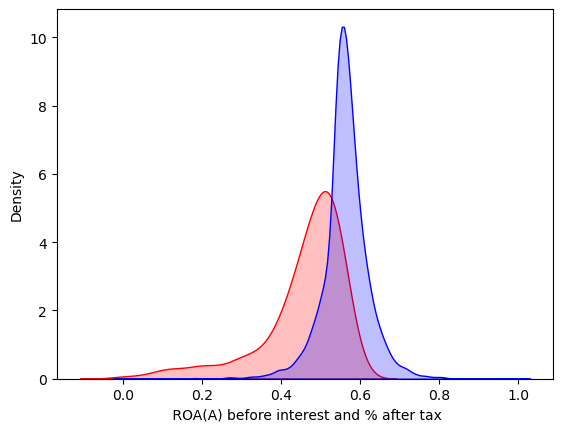

In [318]:
#2nd variable - likelihood of bankruptcy
fig = sns.kdeplot(df1[' ROA(A) before interest and % after tax'], shade=True, color="r") #bankrupt
fig = sns.kdeplot(df0[' ROA(A) before interest and % after tax'], shade=True, color="b") #not bankrupt
plt.show()

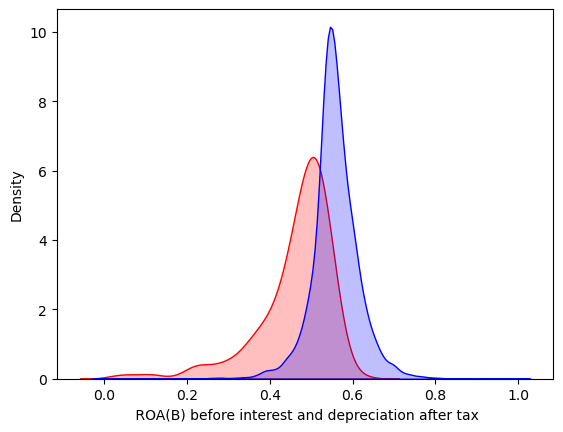

In [319]:
#3rd variable - likelihood of bankruptcy
fig = sns.kdeplot(df1[' ROA(B) before interest and depreciation after tax'], shade=True, color="r") #bankrupt
fig = sns.kdeplot(df0[' ROA(B) before interest and depreciation after tax'], shade=True, color="b") #not bankrupt
plt.show()

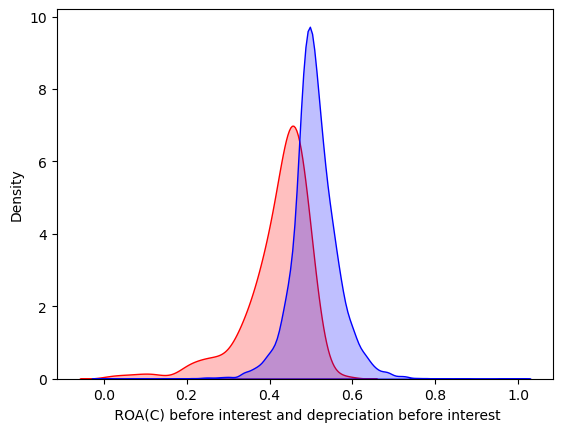

In [320]:
#4th variable - likelihood of bankruptcy
fig = sns.kdeplot(df1[' ROA(C) before interest and depreciation before interest'], shade=True, color="r") #bankrupt
fig = sns.kdeplot(df0[' ROA(C) before interest and depreciation before interest'], shade=True, color="b") #not bankrupt
plt.show()

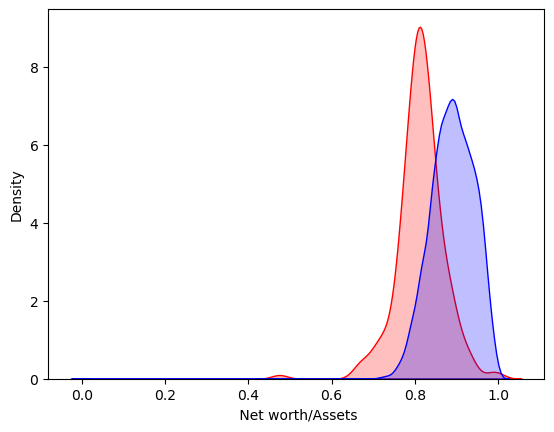

In [321]:
#5th variable - likelihood of bankruptcy
fig = sns.kdeplot(df1[' Net worth/Assets'], shade=True, color="r") #bankrupt
fig = sns.kdeplot(df0[' Net worth/Assets'], shade=True, color="b") #not bankrupt
plt.show()

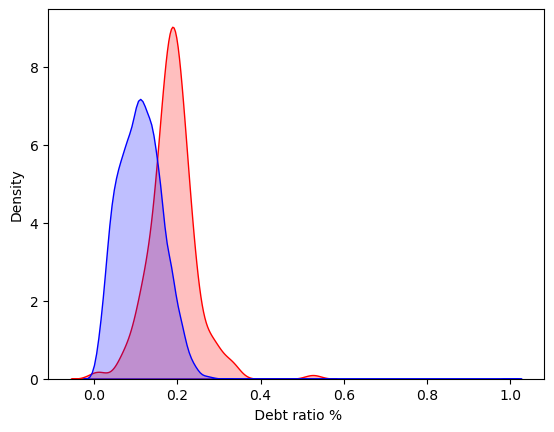

In [322]:
#6th variable - likelihood of bankruptcy
fig = sns.kdeplot(df1[' Debt ratio %'], shade=True, color="r") #bankrupt
fig = sns.kdeplot(df0[' Debt ratio %'], shade=True, color="b") #not bankrupt
plt.show()

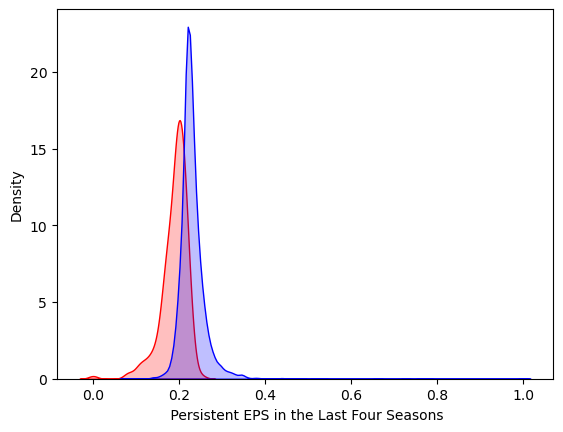

In [323]:
#7th variable - likelihood of bankruptcy
fig = sns.kdeplot(df1[' Persistent EPS in the Last Four Seasons'], shade=True, color="r") #bankrupt
fig = sns.kdeplot(df0[' Persistent EPS in the Last Four Seasons'], shade=True, color="b") #not bankrupt
plt.show()

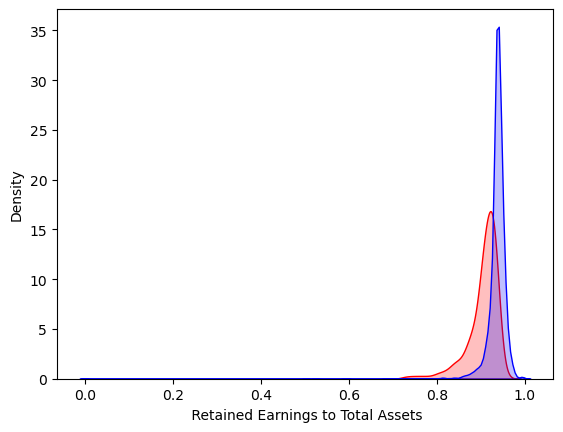

In [324]:
#8th variable - likelihood of bankruptcy
fig = sns.kdeplot(df1[' Retained Earnings to Total Assets'], shade=True, color="r") #bankrupt
fig = sns.kdeplot(df0[' Retained Earnings to Total Assets'], shade=True, color="b") #not bankrupt
plt.show()

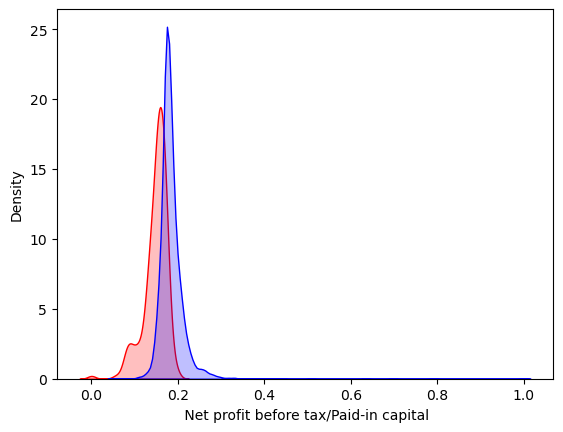

In [325]:
#9th variable - likelihood of bankruptcy
fig = sns.kdeplot(df1[' Net profit before tax/Paid-in capital'], shade=True, color="r") #bankrupt
fig = sns.kdeplot(df0[' Net profit before tax/Paid-in capital'], shade=True, color="b") #not bankrupt
plt.show()

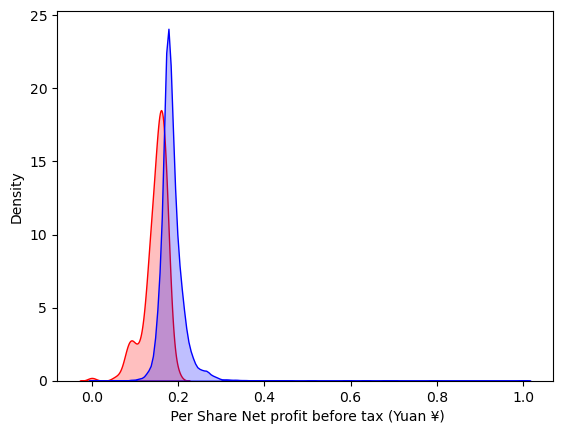

In [326]:
#10th variable - likelihood of bankruptcy
fig = sns.kdeplot(df1[' Per Share Net profit before tax (Yuan ¥)'], shade=True, color="r") #bankrupt
fig = sns.kdeplot(df0[' Per Share Net profit before tax (Yuan ¥)'], shade=True, color="b") #not bankrupt
plt.show()